# Common imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
import copy
from scipy import ndimage
import cv2



# Provided functions
### Image loading and saving

In [2]:
def LoadInputImages(subject_name):
    

    def load_image(fname):
        ''' Read and convert the image to grayscale'''
        im = Image.open(fname, 'r')
        img = im.convert('L')
        return np.asarray(img)
    
    img1 = load_image(subject_name + "_a.jpg")
    img2 = load_image(subject_name + "_b.jpg")
    return img1/255, img2/255

In [3]:
def save_outputs(subject_name, hybrid_image):
    ''' Save outputs to disk'''
    im = Image.fromarray((hybrid_image*255).astype(np.uint8))
    #op = (((hybrid_image - hybrid_image.min()) / (hybrid_image.max() - hybrid_image.min())) * 255.9).astype(np.uint8)
    
    im.save("%s_hybrid.jpg" % subject_name)
    

In [4]:
def plot_two_images(img1,title1, img2, title2):
    """
    Plot two images side by side in grayscale
    """
    fig = plt.figure()
    ax = plt.subplot(1, 2, 1)
    ax.axis('off')
    ax.set_title(title1)
    im = ax.imshow(img1,cmap="gray")
    ax = plt.subplot(1, 2, 2)
    ax.axis('off')
    ax.set_title(title2)
    im = ax.imshow(img2,cmap="gray")

In [5]:
def plot_one_image(subject_image, title):
    fig = plt.figure()
    plt.imshow(subject_image*255, cmap='gray')
    plt.axis('off')
    plt.title(title)

In [6]:
def filter_lp(input_image, sigma_image = 1.2, truncate_image = 4):
    ''' Low Pass Filter of image'''
    lpf_image = ndimage.gaussian_filter(input_image, sigma = sigma_image, truncate = truncate_image )
    plot_two_images(input_image,"Input image", lpf_image , " LPF output")
    print(lpf_image.shape, np.amin(lpf_image), np.amax(lpf_image))
    return lpf_image
    
    

In [7]:
def filter_hp(input_image, sigma_image = 16.2, truncate_image = 4):
    ''' High Pass Filter of image, negative values are adjusted by adding the minimum value'''
    hpf_image = input_image - ndimage.gaussian_filter(input_image, sigma = sigma_image,truncate = truncate_image )
    print(hpf_image.shape,np.amin(hpf_image), np.amax(hpf_image))
    hpf_image_adjusted = np.clip(hpf_image + abs(np.amin(hpf_image)), 0, 1)
    print(hpf_image_adjusted.shape,np.amin(hpf_image_adjusted), np.amax(hpf_image_adjusted))
    plot_two_images(input_image,"Input image", hpf_image_adjusted, " HPF output")
    
    return hpf_image_adjusted 

In [8]:
def generate_hybrid(lpf_image, hpf_image,subject_name):
    ''' Generate hybrid image'''
    hybrid_image = np.clip((lpf_image + hpf_image)/2,0,1)
    plot_one_image(hybrid_image, "Hybrid Image of " + subject_name)
    print(hybrid_image.shape)
    save_outputs(subject_name, hybrid_image)
    return hybrid_image
    

In [9]:
def vis_hybrid_image(hybrid_image):
  ''' Reference code : https://www.cc.gatech.edu/~hays/compvision/proj1/'''  
  ''' Code to downsample image for visualization'''
  scales = 5
  scale_factor = 0.5
  padding = 5
  original_height = hybrid_image.shape[0]
  

  output = np.copy(hybrid_image)
  cur_image = np.copy(hybrid_image)
  for scale in range(2, scales+1):
    # add padding
    output = np.hstack((output, np.ones((original_height, padding),
                                        dtype=np.float32)))

    # downsample image
    cur_image = cv2.resize(cur_image, (0, 0), fx=scale_factor, fy=scale_factor)

    # pad the top to append to the output
    pad = np.ones((original_height-cur_image.shape[0], cur_image.shape[1]), dtype=np.float32)
    tmp = np.vstack((pad, cur_image))
    output = np.hstack((output, tmp))

  return output

# Main function

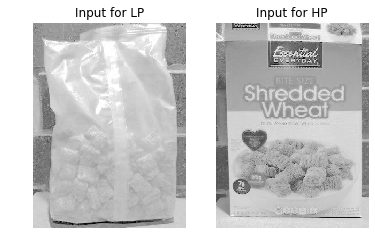

In [10]:

subject_name = 'cereal'
img1, img2 = LoadInputImages(subject_name)
plot_two_images(img1,"Input for LP", img2, "Input for HP")

In [11]:
#Debug hooks
print(np.shape(img1), img2.shape)
print(np.amax(img1), np.amin(img1))
print(np.amax(img2), np.amin(img2))
print(img1.dtype, img2.dtype)

(385, 286) (385, 286)
1.0 0.03137254901960784
0.9803921568627451 0.00784313725490196
float64 float64


(385, 286) 0.2653648273199216 0.9980708522862243


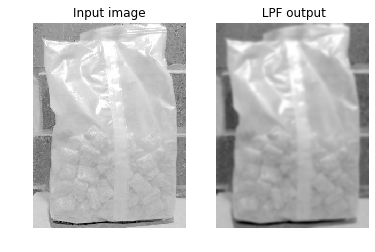

In [12]:
#Low Pass Filter
lpf_image = filter_lp(img1, sigma_image = 2)


(385, 286) -0.6979547944362813 0.44729144591560926
(385, 286) 0.0 1.0


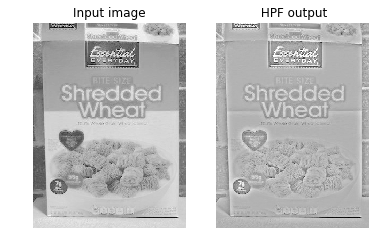

In [13]:
#### High Pass Filter 
hpf_image = filter_hp(img2, sigma_image = 5)



(385, 286)


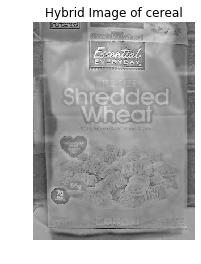

In [14]:
hybrid_image = generate_hybrid(lpf_image, hpf_image, subject_name)


(385, 575)


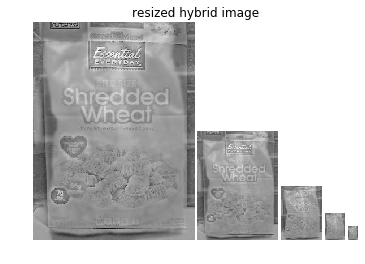

In [15]:
rescaled_hybrid_image = vis_hybrid_image(hybrid_image)
print(rescaled_hybrid_image.shape)
plot_one_image(rescaled_hybrid_image, "resized hybrid image")
save_outputs('cereal_resized', rescaled_hybrid_image)

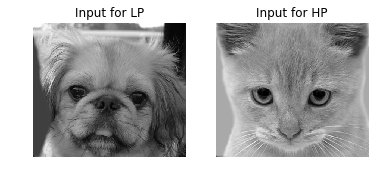

In [16]:
subject_name = 'dog'
img1, img2 = LoadInputImages(subject_name)
plot_two_images(img1,"Input for LP", img2, "Input for HP")

In [17]:
#Debug hooks
print(np.shape(img1), img2.shape)
print(np.amax(img1), np.amin(img1))
print(np.amax(img2), np.amin(img2))
print(img1.dtype, img2.dtype)

(361, 410) (361, 410)
1.0 0.08235294117647059
0.984313725490196 0.0
float64 float64


(361, 410) 0.10267681830945598 0.9942133782101855


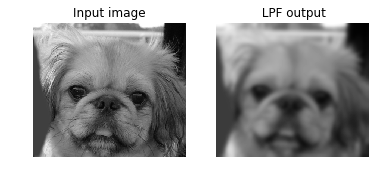

In [18]:
#Low Pass Filter
lpf_image = filter_lp(img1, sigma_image = 5)



(361, 410) -0.46962371676412973 0.32320184207099256
(361, 410) 0.0 0.7928255588351223


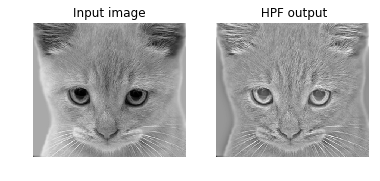

In [19]:
#High Pass Filter 
hpf_image = filter_hp(img2, sigma_image = 11)

(361, 410)


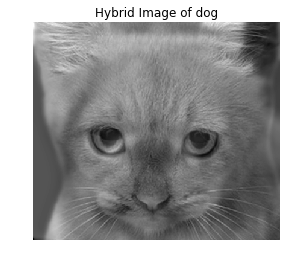

In [20]:
hybrid_image = generate_hybrid(lpf_image, hpf_image, subject_name)

(361, 814)


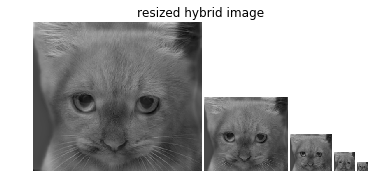

In [21]:
rescaled_hybrid_image = vis_hybrid_image(hybrid_image)
print(rescaled_hybrid_image.shape)
plot_one_image(rescaled_hybrid_image, "resized hybrid image")
save_outputs('dog_resized', rescaled_hybrid_image)

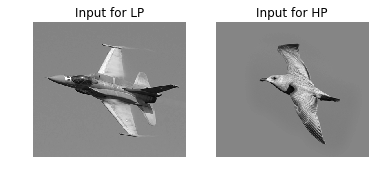

In [22]:
subject_name = 'plane'
img1, img2 = LoadInputImages(subject_name)
plot_two_images(img1,"Input for LP", img2, "Input for HP")

In [23]:
#Debug hooks
print(np.shape(img1), img2.shape)
print(np.amax(img1), np.amin(img1))
print(np.amax(img2), np.amin(img2))
print(img1.dtype, img2.dtype)

(331, 375) (331, 375)
1.0 0.054901960784313725
0.9411764705882353 0.050980392156862744
float64 float64


(331, 375) 0.13313021739512113 0.943744775953471


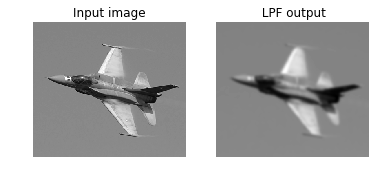

In [38]:
#Low Pass Filter
lpf_image = filter_lp(img1, sigma_image = 3)

(331, 375) -0.5158186317575261 0.4196711043810203
(331, 375) 0.0 0.9354897361385464


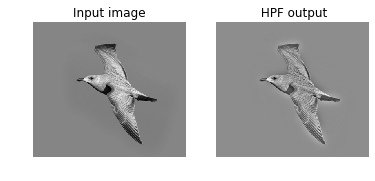

In [39]:
#High Pass Filter 
hpf_image = filter_hp(img2, sigma_image = 9)

(331, 375)


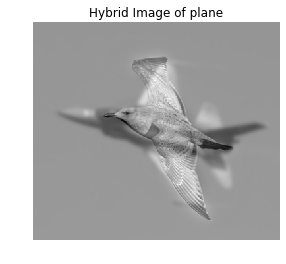

In [40]:
hybrid_image = generate_hybrid(lpf_image, hpf_image, subject_name)

(331, 748)


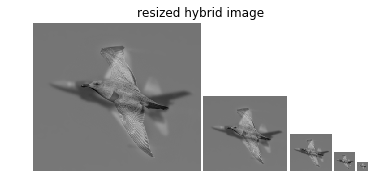

In [41]:
rescaled_hybrid_image = vis_hybrid_image(hybrid_image)
print(rescaled_hybrid_image.shape)
plot_one_image(rescaled_hybrid_image, "resized hybrid image")
save_outputs('plane_resized', rescaled_hybrid_image)